# sympy tutorial

reference
1. [official site](https://www.sympy.org/en/index.html)
2. [github](https://github.com/sympy/sympy)
3. [get started](https://docs.sympy.org/latest/tutorial/index.html)

In [1]:
import numpy as np

In [2]:
import sympy
from sympy import symbols, Rational, Matrix
from sympy import sqrt, sin, cos, tan, sec, sinh, cosh, tanh
from sympy import factor, expand, expand_trig, trigsimp, simplify, collect, cancel, apart
from sympy import diff, Derivative
from sympy import integrate, Integral
from sympy import limit, Limit
from sympy import series
from sympy import init_printing, srepr, pprint, pretty, latex #printer
from sympy import powsimp, expand_power_exp, expand_power_base, powdenest
from sympy import exp, log, expand_log, logcombine
from sympy import factorial, binomial, gamma, expand_func
# sympy.pi sympy.Abs
# forbidden: sympy.sympify sympy.lambdify

In [3]:
init_printing()

In [4]:
x,y,z,a,b = symbols('x y z a b')

p1,p2,p3 = symbols('p1 p2 p3', positive=True) #default complex
r1,r2,r3 = symbols('r1 r2 r3', real=True)
i1,i2,i3 = symbols('i1 i2 i3', integer=True)
c1,c2,c3 = symbols('c1 c2 c3')
# local variable naming use "tmp0/tmp1/tmp2/.../t0/t1/t2/..."

# element

In [5]:
x,y,z #sympy.core.symbol.Symbol
sympy.pi #sympy.core.numbers.Pi
Rational(1, 3) #sympy.core.numbers.Rational
x*y + z #sympy.core.expr.Expr

In [6]:
Matrix([[1,2],[3,4]])
Matrix([1,2,3])

expr0 = Matrix([[x,x],[y,y]])
expr0.shape
expr0.tolist()

In [7]:
# quantum circuit, dephasing noise
rho00,rho01,rho10,rho11 = symbols('rho00 rho01 rho10 rho11')
tmp0 = Matrix([[rho00,rho01],[rho10,rho11]])
px,py,pz = symbols('p_x p_y p_z', real=True, positive=True)
Pauli0 = Matrix([[1,0],[0,1]])
PauliX = Matrix([[0,1],[1,0]])
PauliY = Matrix([[0,-1j],[1j,0]])
PauliZ = Matrix([[1,0],[0,-1]])
simplify((1-pz)*tmp0 + pz*PauliZ*tmp0*PauliZ)

⎡      ρ₀₀        ρ₀₁⋅(1 - 2⋅p_z)⎤
⎢                                ⎥
⎣ρ₁₀⋅(1 - 2⋅p_z)        ρ₁₁      ⎦

In [8]:
# quantum circuit, depolarizing noise
rho00,rho01,rho10,rho11 = symbols('rho00 rho01 rho10 rho11')
tmp0 = Matrix([[rho00,rho01],[rho10,rho11]])
Pauli0 = Matrix([[1,0],[0,1]])
PauliX = Matrix([[0,1],[1,0]])
PauliY = Matrix([[0,-1j],[1j,0]])
PauliZ = Matrix([[1,0],[0,-1]])
Pauli0*tmp0*Pauli0 + PauliX*tmp0*PauliX + PauliY*tmp0*PauliY + PauliZ*tmp0*PauliZ

⎡2⋅ρ₀₀ + 2.0⋅ρ₁₁         0       ⎤
⎢                                ⎥
⎣       0         2.0⋅ρ₀₀ + 2⋅ρ₁₁⎦

In [9]:
# quantum circuit, amplitude dampling
rho00,rho01,rho10,rho11 = symbols('rho00 rho01 rho10 rho11')
epsilon = symbols('epsilon', real=True, positive=True)
tmp0 = Matrix([[rho00,rho01],[rho10,rho11]])
tmp1 = Matrix([[1,0], [0,sqrt(1-epsilon)]])
tmp2 = Matrix([[0,sqrt(epsilon)], [0,0]])
tmp1*tmp0*tmp1 + tmp2*tmp0*tmp2.T

⎡                     _______⎤
⎢ ε⋅ρ₁₁ + ρ₀₀   ρ₀₁⋅╲╱ 1 - ε ⎥
⎢                            ⎥
⎢      _______               ⎥
⎣ρ₁₀⋅╲╱ 1 - ε    ρ₁₁⋅(1 - ε) ⎦

In [10]:
expr = x**2 + (y**3)*z
expr.subs(x, y)
expr.subs(x, x**2)
expr.subs([(x,2), (y,23), (z,233)])

sympy.pi.subs(sympy.pi, 233) #hehe

In [11]:
sympy.pi.evalf(23)

expr = x*y+z
expr.evalf(23, subs={x:0.2, y:0.23, z:0.233})

expr = cos(1)**2 + sin(1)**2 - 1
expr.evalf(), expr.evalf(chop=True)

# TODO

# derivative

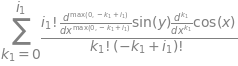

In [12]:
expr = cos(x)
diff(expr, x), diff(expr, x, x), diff(expr, x, x, x)
Derivative(expr, x, 1).doit()

expr = cos(x) * sin(y)
diff(expr, x, y, y), diff(expr, x, 1, y, 2)

diff(expr, (x, i1))

# integral

In [13]:
expr = cos(x)
integrate(expr, x)
Integral(expr, x).doit()

integrate(exp(-x), (x,0,sympy.oo))

integrate(exp(-x**2-y**2), (x,-sympy.oo,sympy.oo), (y,-sympy.oo,sympy.oo))

integrate(x**i1*exp(-x), (x,0,sympy.oo))

⎧ Γ(i₁ + 1)    for i₁ > -1
⎪                         
⎪∞                        
⎪⌠                        
⎨⎮  i₁  -x                
⎪⎮ x  ⋅ℯ   dx   otherwise 
⎪⌡                        
⎪0                        
⎩                         

# limit

In [14]:
expr = sin(x)/x
limit(expr, x, 0)
Limit(expr, x, 0).doit()

expr = sin(x)/sympy.Abs(x)
limit(expr, x, 0, dir='+')
limit(expr, x, 0, dir='-')

# series expansion

In [15]:
x*sympy.O(1)
x*sympy.O(x)

expr = sin(x)
series(expr, x, 0, 6)
series(expr, x, 0, 6).removeO()

## printer

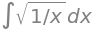

In [16]:
expr = Integral(sqrt(1/x), x)
expr

In [17]:
print(expr)

Integral(sqrt(1/x), x)


In [18]:
srepr(expr)

"Integral(Pow(Pow(Symbol('x'), Integer(-1)), Rational(1, 2)), Tuple(Symbol('x')))"

In [19]:
pprint(expr, use_unicode=False)
print(pretty(expr, use_unicode=False))

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            
  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


In [20]:
print(latex(expr))

\int \sqrt{\frac{1}{x}}\, dx


## simplification

In [21]:
simplify(sin(x)**2 + cos(x)**2),  simplify((x**3+x**2-x-1)/(x**2+2*x+1)),  simplify(gamma(x)/gamma(x-2))

In [22]:
expr = x**2 + 2*x + 1
factor(expr), simplify(expr)

In [23]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

In [24]:
factor(expand((cos(x)+sin(x))**2))

In [25]:
expand(x*(x+2*y) - x**2)

In [26]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
collect(expr, x), collect(expr, x).coeff(x,2)

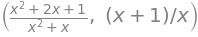

In [27]:
expr = (x**2 + 2*x + 1)/(x**2 + x)
expr, cancel(expr)

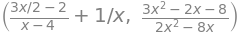

In [28]:
expr = 1/x + (3*x/2-2)/(x-4)
expr, cancel(expr)

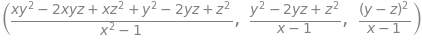

In [29]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
expr, cancel(expr), factor(expr)

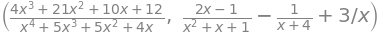

In [30]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr, apart(expr)

In [31]:
expr1 = sin(x)**2 + cos(x)**2
expr2 = sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4
expr3 = sin(x)*tan(x)/sec(x)
expr4 = cosh(x)**2 + sinh(x)**2
expr5 = sinh(x)/tanh(x)
trigsimp(expr1), trigsimp(expr2), trigsimp(expr3), trigsimp(expr4), trigsimp(expr5)

In [32]:
expr = sin(2*x) + cos(2*x)
expand_trig(expr), expr.subs(sin(2*x), 2*sin(x)*cos(x))

In [33]:
expand_trig(sin(x+y))

In [34]:
trigsimp(expand_trig(tan(2*x)))

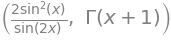

In [35]:
tan(x).rewrite(sin), factorial(x).rewrite(gamma)

## Powers

In [36]:
sqrt(x)==x**Rational(1,2)

True

In [37]:
expr1 = x**a*x**b - x**(a+b)
expr2 = x**a*y**a - (x*y)**a
expr3 = (x**a)**b - x**(a*b)
powsimp(expr1), powsimp(expr2), powsimp(expr3)

In [38]:
expr1 = x**a*y**a
expr2 = p1**r1*p2**r1
powsimp(expr1), powsimp(expr1,force=True), powsimp(expr2)

In [39]:
expr1 = (x**a)**b
expr2 = (x**a)**i1
(
    powsimp(expr1), powsimp(expr1,force=True), powsimp(expr2),
    powdenest(expr1), powdenest(expr1, force=True), powdenest(expr2),
)

In [40]:
expand_power_exp(x**(a+b))

In [41]:
expr1 = (x*y)**a
expr2 = (p1*p2)**r1
expand_power_base(expr1), expand_power_base(expr1, force=True), expand_power_base(expr2)

## Exponentials and logarithms

In [42]:
expr1 = log(x*y)
expr2 = log(x) + log(y)
expr3 = log(p1*p2)
expr4 = log(p1) + log(p2)
expand_log(expr1), logcombine(expr2), expand_log(expr3), logcombine(expr4)

In [43]:
expr1 = log(x**y)
expr2 = y*log(x)
expr3 = log(p1**r1)
expr4 = r1*log(p1)
expand_log(expr1), logcombine(expr2), expand_log(expr3), logcombine(expr4)

## Special Functions

In [44]:
factorial(a), factorial(i1), factorial(4)

In [45]:
binomial(a, b), binomial(5, 3)

In [46]:
gamma(x), gamma(i1)

In [47]:
expand_func(gamma(x + 3))

## eval-based function (forbidden)

In [48]:
# sympy.sympify
# sympy.lambdify